<a href="https://colab.research.google.com/github/alinapradhan/AdaBoost-Image-Projects/blob/main/AdaBoost_Image_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

scikit-learn version: 1.6.1
Training AdaBoost on MNIST...
Accuracy: 0.7498571428571429
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1381
           1       0.88      0.89      0.89      1575
           2       0.74      0.75      0.74      1398
           3       0.78      0.70      0.74      1428
           4       0.71      0.66      0.68      1365
           5       0.59      0.70      0.64      1263
           6       0.85      0.82      0.83      1375
           7       0.87      0.71      0.78      1459
           8       0.72      0.72      0.72      1365
           9       0.56      0.73      0.63      1391

    accuracy                           0.75     14000
   macro avg       0.76      0.75      0.75     14000
weighted avg       0.76      0.75      0.75     14000



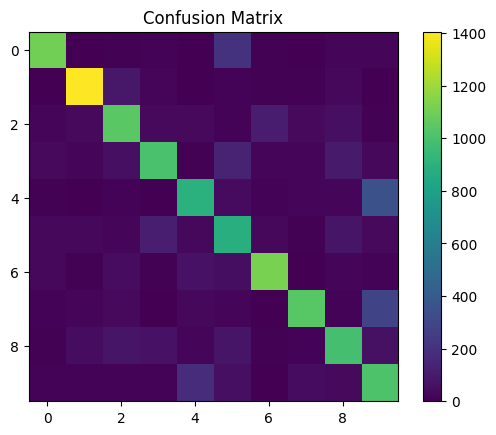

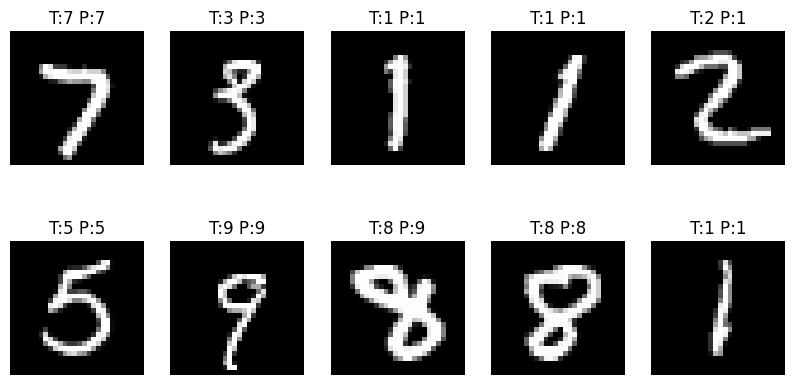

error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [5]:
# AdaBoost Projects on Images (Step-by-Step Code, Fixed for New scikit-learn)

# =============================
# 1) MNIST Digit Classification
# =============================

import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import sklearn

print("scikit-learn version:", sklearn.__version__)

# Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)
X = X / 255.0  # Normalize pixel values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize AdaBoost with decision stump
base = DecisionTreeClassifier(max_depth=1, random_state=42)

# Use `estimator` (new sklearn >=1.2) instead of `base_estimator`
clf = AdaBoostClassifier(estimator=base, n_estimators=150, learning_rate=0.5, random_state=42)

# Train
print("Training AdaBoost on MNIST...")
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap="viridis")
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

# Show some predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"T:{y_test[i]} P:{y_pred[i]}")
    ax.axis("off")
plt.show()


# =============================
# 2) Face Detection (Haar Cascade)
# =============================

import cv2
import sys

# Load Haar cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

if len(sys.argv) > 1 and sys.argv[1] != "--webcam":
    # Detect faces in an image
    img = cv2.imread(sys.argv[1])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    cv2.imshow("Detected Faces", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

else:
    # Detect faces using webcam
    cap = cv2.VideoCapture(0)
    while True:
        ret, frame = cap.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.imshow("Webcam Face Detection", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


# =============================
# 3) Simple AdaBoost on HOG (Face vs Non-Face)
# =============================

import os
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.feature import hog
from sklearn.model_selection import train_test_split

# Load dataset (folders: data/faces, data/nonfaces)
def load_hog_dataset(base_folder, size=(64, 64)):
    X, y = [], []
    for label, sub in [(1, "faces"), (0, "nonfaces")]:
        folder = os.path.join(base_folder, sub)
        for fname in os.listdir(folder):
            img = imread(os.path.join(folder, fname))
            if img.ndim == 3:
                img = rgb2gray(img)
            img = resize(img, size)
            features = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
            X.append(features)
            y.append(label)
    return np.array(X), np.array(y)

# Train AdaBoost on HOG
X, y = load_hog_dataset("data")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=200)
clf.fit(X_train, y_train)

print("HOG + AdaBoost Accuracy:", clf.score(X_test, y_test))